In [1]:
%reload_ext autoreload
%autoreload 2
from DOI_analysis_functions import *

no caiman available
no pandastim available


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_folder = r"D:\behavior\data" # For lab computer
# data_folder = "/Volumes/NAUMANN LAB/behavior/data" # For personal Macbook
exp_folder = "EK_6dpf_DOI_50ugml_20230206"

## For new experiments

In [ ]:
# Set the folder directory to where the rig files are located
parent_folder = os.path.join(data_folder, exp_folder)

In [ ]:
create_newdf(parent_folder)

In [ ]:
create_newboutdf(parent_folder)

In [ ]:
# Re-run the OMR experiments

exps = ["EK_8dpf_DOI_50ugml_20230201", "EK_8dpf_DOI_0ugml_20230201"]
for exp in exps:
    parent_folder = os.path.join(data_folder, exp)
#     create_newdf(parent_folder)
    create_newboutdf(parent_folder)

In [ ]:
# Re-run the locomotor experiments

exps = ['EK_6dpf_DOI_0ugml_20211111', 'EK_6dpf_DOI_0ugml_2_20211111', 'EK_7dpf_DOI_10ugml_20211112', 
        'EK_7dpf_DOI_10ugml_2_20211112', 'EK_9dpf_DOI_50ugml_20211114', 'EK_9dpf_DOI_50ugml_2_20211114', 
        'EK_10dpf_DOI_75ugml_20211115', 'EK_10dpf_DOI_75ugml_2_20211115', 'EK_11dpf_DOI_100ugml_2_20211116', 
        'EK_6dpf_DOI_75ugml_20211117', 'EK_6dpf_DOI_75ugml_2_20211117', 'EK_7dpf_DOI_100ugml_20211118', 
        'EK_7dpf_DOI_100ugml_2_20211118', 'EK_8dpf_DOI_0ugml_20211119', 'EK_8dpf_DOI_0ugml_2_20211119', 
        'EK_11dpf_DOI_50ugml_2_20211122', 'EK_11dpf_DOI_25ugml_20211122', 'EK_6dpf_DOI_25ugml_20211129', 
        'EK_6dpf_DOI_25ugml_2_20211129', 'EK_6dpf_DOI_50ugml_20211129', 'EK_7dpf_DOI_50ugml_20211130', 
        'EK_7dpf_DOI_50ugml_2_20211130', 'EK_8dpf_DOI_25ugml_20211201', 'EK_8dpf_DOI_25ugml_2_20211201', 
        'EK_8dpf_DOI_75ugml_20211201', 'EK_9dpf_DOI_100ugml_20211202', 'EK_9dpf_DOI_100ugml_2_20211202', 
        'EK_9dpf_DOI_100ugml_3_20211202', 'EK_10dpf_DOI_25ugml_20211203', 'EK_10dpf_DOI_25ugml_2_20211203', 
        'EK_6dpf_DOI_50ugml_20211208', 'EK_6dpf_DOI_10ugml_20211208', 'EK_7dpf_DOI_10ugml_20211209', 
        'EK_7dpf_DOI_10ugml_2_20211209', 'EK_7dpf_DOI_10ugml_3_20211209', 'EK_8dpf_DOI_75ugml_20211210', 
        'EK_8dpf_DOI_0ugml_20211210', 'EK_6dpf_DOI_10ugml_20211215', 'EK_6dpf_DOI_100ugml_20211215', 
        'EK_7dpf_DOI_100ugml_20211216', 'EK_8dpf_DOI_25ugml_20211217', 'EK_9dpf_DOI_10ugml_20211218', 
        'EK_9dpf_DOI_10ugml_2_20211218', 'EK_10dpf_DOI_0ugml_20211219', 'EK_10dpf_DOI_0ugml_2_20211219']
for exp in exps:
    parent_folder = fr"C:\Users\minel\iCloudDrive\Documents\Duke University\Naumann Lab\DOI\Behavior\locomotor_behavior\{exp}"
    create_newdf(parent_folder)
    create_newboutdf(parent_folder)

## Eliminate bad fish

In [4]:
try:
    selected_fish = pd.read_hdf(os.path.join(data_folder, 'selected_fish.h5'))
    selected_dict = selected_fish.to_dict()
    selected_dict
except FileNotFoundError:
    selected_dict = {
        "0ugml" : {8:[]},
        "50ugml" : {8 :[]},
        "100ugml" : {8:[]}
    }

In [5]:
parent_folder = os.path.join(data_folder, exp_folder)

In [6]:
# Read the exp dataframes
lvl = 'exp'
conc = parent_folder[parent_folder.rfind('DOI')+4 : parent_folder.rfind('ugml')+4]
age = int(parent_folder[:parent_folder.rfind('dpf')][parent_folder[:parent_folder.rfind('dpf')].rfind('_')+1:])
df_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finaldf.h5')
df = pd.read_hdf(df_path)
bout_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finalboutdf.h5')
boutdf = pd.read_hdf(bout_path)

In [7]:
df

,f0_x,f0_vx,f0_y,f0_vy,f0_theta,f0_vtheta,f0_theta_00,f0_theta_01,f0_theta_02,f0_theta_03,biggest_area,t,stim_index,motion,stim_type,angle,stim_name,stat_time,duration,fish_id,bout,stim_time,condition
0,646.383423,-0.001168,783.321838,-0.026464,-1.917537,-0.001022,-0.021804,-0.032874,-0.055949,-0.000573,850.0,0.000000,0.0,1.0,s,0,habituation,0,300.0,445,NaN,0.000000,baseline
1,646.408813,0.011629,783.335815,-0.006975,-1.898915,0.008443,-0.009505,-0.054151,-0.047215,-0.062799,850.0,0.006980,0.0,1.0,s,0,habituation,0,300.0,445,NaN,0.006670,baseline
2,646.397705,0.000681,783.343445,0.000077,-1.910622,-0.001267,-0.020952,-0.028964,0.019027,0.047285,850.0,0.013963,0.0,1.0,s,0,habituation,0,300.0,445,NaN,0.013340,baseline
3,646.404236,0.003494,783.352112,0.004188,-1.915493,-0.003003,-0.023136,-0.029025,0.014585,0.036085,850.0,0.020944,0.0,1.0,s,0,habituation,0,300.0,445,NaN,0.020011,baseline
4,646.402161,0.000820,783.305603,-0.020222,-1.918122,-0.002823,-0.020804,-0.027986,-0.025769,0.024438,850.0,0.026928,0.0,1.0,s,0,habituation,0,300.0,445,NaN,0.026681,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205315,67.356430,-0.009953,578.926941,0.401204,-1.541663,-0.000701,0.004318,0.036449,0.064401,0.097511,2725.0,3569.326904,108.0,1.0,s,270,right,3,33.0,443,4219.0,32.970878,drugtreated
1205316,67.400589,0.016110,577.752869,-0.357875,-1.540088,0.000395,0.012346,0.033064,0.068268,0.093117,2725.0,3569.334961,108.0,1.0,s,270,right,3,33.0,443,4219.0,32.977548,drugtreated
1205317,67.442513,0.028544,575.854004,-1.100413,-1.540091,0.000204,0.015373,0.040482,0.072986,0.094626,2950.0,3569.342041,108.0,1.0,s,270,right,3,33.0,443,4219.0,32.984218,drugtreated
1205318,67.439697,0.013438,578.827576,0.862694,-1.545974,-0.002729,0.007737,0.039105,0.069105,0.097345,2725.0,3569.348145,108.0,1.0,s,270,right,3,33.0,443,4219.0,32.990888,drugtreated


In [8]:
boutcount_df = measurepertime(boutdf, measure='boutcount', time='min')
boutcount_df

443                    445            
              baseline drugtreated   baseline drugtreated
habituation   9.000000    0.000000   5.400000    0.000000
forward      32.323232   85.454545  11.818182    5.454545
right        23.181818   95.636364   1.818182    8.787879
left         29.090909  105.064935   1.818182   30.303030
backward     28.787879   96.545455   5.454545    9.870130

In [9]:
# for x in boutcount_df[442]['baseline'].values:
#     print(x)
# vals.e
data_top = boutcount_df.head() 
lst = list(data_top.index)
print(lst)

['habituation', 'forward', 'right', 'left', 'backward']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['0ugml', '50ugml', '100ugml']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


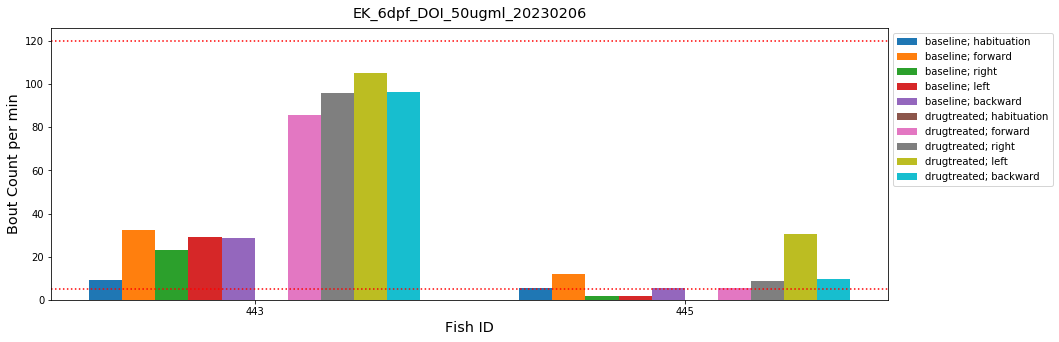

In [10]:
fish_criteria_checker = barplot_perfish(parent_folder, boutcount_df, level=lvl)
good_fish = fish_criteria_checker[0]
inactive_fish = fish_criteria_checker[1]
if len(good_fish) > 0:
    if age not in selected_dict[conc].keys():
        selected_dict[conc][age] = []
    try:
        if np.isnan(selected_dict[conc][age]):
            selected_dict[conc][age] = []
            
    except ValueError:
        pass
    [selected_dict[conc][age].append(fish) for fish in good_fish if fish not in selected_dict[conc][age]]
    pd.DataFrame(selected_dict).to_hdf(os.path.join(data_folder, 'selected_fish.h5'), key='selected_fish', mode='w')

In [11]:
print(good_fish)
print(inactive_fish)

[443, 443]
[445, 445]


In [ ]:
selected_dict

In [ ]:
lineplot_perfish(parent_folder, boutdf, level=lvl, measure='distance')

In [ ]:
lineplot_perfish(parent_folder, boutdf, level=lvl, measure='dist_from_center')

In [ ]:
histplot(parent_folder, boutdf, level=lvl, measure='bout_duration')

In [ ]:
histplot_perfish(parent_folder, boutdf, level=lvl, measure='bout_angle')

In [ ]:
scatterplot_perfish(parent_folder, df, level=lvl, stim_name='right')

In [ ]:
scatterplot_perfish(parent_folder, df, level=lvl, stim_name='left')

In [ ]:
# Re-run the OMR experiments

exps = ['EK_8dpf_DOI_50ugml_20230201']
for exp in exps:
    parent_folder = os.path.join(data_folder, exp_folder)
    scatterplot_perfish(parent_folder, df, level=lvl, stim_name='right')
    scatterplot_perfish(parent_folder, df, level=lvl, stim_name='left')

In [ ]:
# Re-run the locomotor experiments
DOI_concs = ['0ugml', '10ugml', '25ugml', '50ugml', '75ugml', '100ugml']
lvl = 'exp'
selected_dict = {_conc: {} for _conc in DOI_concs}
exps = ['EK_6dpf_DOI_0ugml_20211111', 'EK_6dpf_DOI_0ugml_2_20211111', 'EK_7dpf_DOI_10ugml_20211112', 
        'EK_7dpf_DOI_10ugml_2_20211112', 'EK_9dpf_DOI_50ugml_20211114', 'EK_9dpf_DOI_50ugml_2_20211114', 
        'EK_10dpf_DOI_75ugml_20211115', 'EK_10dpf_DOI_75ugml_2_20211115', 'EK_11dpf_DOI_100ugml_2_20211116', 
        'EK_6dpf_DOI_75ugml_20211117', 'EK_6dpf_DOI_75ugml_2_20211117', 'EK_7dpf_DOI_100ugml_20211118', 
        'EK_7dpf_DOI_100ugml_2_20211118', 'EK_8dpf_DOI_0ugml_20211119', 'EK_8dpf_DOI_0ugml_2_20211119', 
        'EK_11dpf_DOI_50ugml_2_20211122', 'EK_11dpf_DOI_25ugml_20211122', 'EK_6dpf_DOI_25ugml_20211129', 
        'EK_6dpf_DOI_25ugml_2_20211129', 'EK_6dpf_DOI_50ugml_20211129', 'EK_7dpf_DOI_50ugml_20211130', 
        'EK_7dpf_DOI_50ugml_2_20211130', 'EK_8dpf_DOI_25ugml_20211201', 'EK_8dpf_DOI_25ugml_2_20211201', 
        'EK_8dpf_DOI_75ugml_20211201', 'EK_9dpf_DOI_100ugml_20211202', 'EK_9dpf_DOI_100ugml_2_20211202', 
        'EK_9dpf_DOI_100ugml_3_20211202', 'EK_10dpf_DOI_25ugml_20211203', 'EK_10dpf_DOI_25ugml_2_20211203', 
        'EK_6dpf_DOI_50ugml_20211208', 'EK_6dpf_DOI_10ugml_20211208', 'EK_7dpf_DOI_10ugml_20211209', 
        'EK_7dpf_DOI_10ugml_2_20211209', 'EK_7dpf_DOI_10ugml_3_20211209', 'EK_8dpf_DOI_75ugml_20211210', 
        'EK_8dpf_DOI_0ugml_20211210', 'EK_6dpf_DOI_10ugml_20211215', 'EK_6dpf_DOI_100ugml_20211215', 
        'EK_7dpf_DOI_100ugml_20211216', 'EK_8dpf_DOI_25ugml_20211217', 'EK_9dpf_DOI_10ugml_20211218', 
        'EK_9dpf_DOI_10ugml_2_20211218', 'EK_10dpf_DOI_0ugml_20211219', 'EK_10dpf_DOI_0ugml_2_20211219']
for exp in exps:
    parent_folder = fr"C:\Users\minel\iCloudDrive\Documents\Duke University\Naumann Lab\DOI\Behavior\locomotor_behavior\{exp}"
    conc = parent_folder[parent_folder.rfind('DOI')+4 : parent_folder.rfind('ugml')+4]
    age = int(parent_folder[:parent_folder.rfind('dpf')][parent_folder[:parent_folder.rfind('dpf')].rfind('_')+1:])
#     df_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finaldf.h5')
#     df = pd.read_hdf(df_path)
    bout_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finalboutdf.h5')
    boutdf = pd.read_hdf(bout_path)
    boutcount_df = measurepertime(boutdf, measure='boutcount', time='min')
    good_fish = barplot_perfish(parent_folder, boutcount_df, level=lvl)
    if len(good_fish) > 0:
        if age not in selected_dict[conc].keys():
            selected_dict[conc][age] = []
        [selected_dict[conc][age].append(fish) for fish in good_fish if fish not in selected_dict[conc][age]]
        pd.DataFrame(selected_dict).to_hdf(os.path.join(data_folder, 'selected_fish.h5'), key='selected_fish', mode='w')
#     lineplot_perfish(parent_folder, boutdf, level=lvl, measure='distance')
#     lineplot_perfish(parent_folder, boutdf, level=lvl, measure='dist_from_center')
#     histplot(parent_folder, boutdf, level=lvl, measure='bout_duration')
#     histplot_perfish(parent_folder, boutdf, level=lvl, measure='bout_angle')
#     scatterplot_perfish(parent_folder, df, level=lvl, stim_name='right')
#     scatterplot_perfish(parent_folder, df, level=lvl, stim_name='left')

## For combining selected fish with previous experiments

In [ ]:
selected_fish

In [ ]:
# DOI_concs = ['0ugml', '10ugml', '25ugml', '50ugml', '75ugml', '100ugml']
DOI_concs = ['0ugml','50ugml', '100ugml']
# selected_dict = {_conc: {} for _conc in DOI_concs}
selected_fish = pd.read_hdf(os.path.join(data_folder, 'selected_fish.h5'))
selected_dict = selected_fish.to_dict()
selected_dict

In [ ]:
for _conc in DOI_concs:
    try:
        if all(np.isnan(list(selected_dict[_conc].values()))):
            print('No fish for ' + _conc)
            continue
    except:
        
        good_fish = [_fish for _list in list(selected_dict[_conc].values()) if type(_list) == list for _fish in _list]
        create_concdf(data_folder, _conc, good_fish)
        print('concdf created for ' + _conc)

In [ ]:
'''DOI_conc = '100ugml'
good_fish = [114, 115, 116, 117, 119, 120, 185, 186, 188, 189, 190, 192, 193, 194, 195, 196, 237, 238, 239, 240, 241, 242, 243, 
             244] # for 100 ug/ml
create_concdf(data_folder, DOI_conc, good_fish)

DOI_conc = '75ugml'
good_fish = [89, 90, 92, 93, 94, 95, 96, 105, 107, 108, 109, 111, 112, 181, 182, 183, 184, 225, 226, 227, 228] # for 75 ug/ml
create_concdf(data_folder, DOI_conc, good_fish)

DOI_conc = '50ugml'
good_fish = [81, 82, 83, 85, 86, 87, 88, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 205, 206, 207] # for 50 ug/ml
create_concdf(data_folder, DOI_conc, good_fish)

DOI_conc = '25ugml'
good_fish = [153, 155, 156, 157, 158, 159, 160, 173, 174, 175, 176, 178, 179, 180, 197, 198, 199, 200, 201, 203, 204, 245, 246, 
             247, 248] # for 25 ug/ml
create_concdf(data_folder, DOI_conc, good_fish)

DOI_conc = '10ugml'
good_fish = [73, 74, 75, 77, 78, 79, 210, 211, 217, 218, 219, 220, 221, 222, 223, 224, 233, 234, 235, 252, 253, 254, 255, 256] # for 10 ug/ml
create_concdf(data_folder, DOI_conc, good_fish)

DOI_conc = '0ugml'
good_fish = [66, 67, 68, 69, 70, 71, 72, 122, 123, 124, 125, 126, 127, 128, 229, 230, 231, 232, 257, 258, 259, 261, 262, 264] # for 0 ug/ml (egg water)
create_concdf(data_folder, DOI_conc, good_fish)'''

## Within concentration data analysis

In [ ]:
DOI_conc = '50ugml'

In [ ]:
# df_path = os.path.join(data_folder, f'{DOI_conc}_DOI_selected_finaldf.h5')
# df = pd.read_hdf(df_path)
bout_path = os.path.join(data_folder, f'{DOI_conc}_DOI_selected_finalboutdf.h5')
boutdf = pd.read_hdf(bout_path)

In [ ]:
lineplot_perconc(data_folder, boutdf, measure='distance')

In [ ]:
lineplot_perconc_baselinenorm(data_folder, boutdf, measure='distance')

In [ ]:
lineplot_perconc(data_folder, boutdf, measure='dist_from_center')

In [ ]:
lineplot_perconc_baselinenorm(data_folder, boutdf, measure='dist_from_center')

In [ ]:
histplot_perconc(data_folder, boutdf, 'bout_angle')

In [ ]:
histplot_perconc(data_folder, boutdf, 'bout_duration')

## Between concentration data analysis

In [ ]:
create_alldf(data_folder)

In [ ]:
alldf = pd.read_hdf(os.path.join(data_folder, 'alldf.h5'))

In [ ]:
alldf

In [ ]:
plot_all_distovertime(data_folder, alldf)

In [ ]:
bin_sums = plot_all_distovertime_normalized(data_folder, alldf)

In [ ]:
labels = [int(i) for i in alldf.concentration.unique()]
labels.sort()
bin_anova(bin_sums, labels)

In [ ]:
plt_avgperconc(data_folder, alldf, 'dist')

In [ ]:
plt_avgperconc(data_folder, alldf, 'boutcount')

In [ ]:
plt_avgperconc(data_folder, alldf, 'thigmotaxis_dist')

In [ ]:
plt_avgperconc(data_folder, alldf, 'thigmotaxis_time')

In [ ]:
stimulus = 'left'
stimdf = dataframe[dataframe.stim_name==stimulus]
hist, std, bins = Hist(dataframe, boutframe, stims=[stimulus])

fig, ax = plt.subplots(1,4, figsize=(16,6))

ax[0].set_title(f'Cumulative Theta {stimulus}')
ax[1].set_title(f'Cumulative Theta {stimulus}')

for stim_ind in stimdf.stim_index.unique():
    ind_df = stimdf[stimdf.stim_index==stim_ind]
    try:
        ax[0].plot(ind_df.stim_time.values, ind_df.cum_theta.values)
    except:
        pass

try:
    ax[1].plot(bins[1:], gaussian_filter(hist, sigma=1))
except:
    pass

stimulus = 'right'
stimdf = dataframe[dataframe.stim_name==stimulus]
hist, std, bins = Hist(dataframe, boutframe, stims=[stimulus])

for stim_ind in stimdf.stim_index.unique():
    ind_df = stimdf[stimdf.stim_index==stim_ind]
    try:
        ax[2].plot(ind_df.stim_time.values, ind_df.cum_theta.values)
    except:
        pass

try:
    ax[3].plot(bins[1:], gaussian_filter(hist, sigma=1))
except:
    pass

ax[2].set_title(f'Bout Frequency {stimulus}')
ax[3].set_title(f'Bout Frequency {stimulus}')

ax[0].set_xlim(0,15)
ax[0].set_ylim(-10,10)
ax[2].set_xlim(0,15)
ax[2].set_ylim(-10,10)

ax[1].set_ylim(-5,100)
ax[3].set_ylim(-5,100)

fig.suptitle(f'fish: {3},  rig: {5}')
plt.show()